<a href="https://colab.research.google.com/github/cancionrota/Borrador/blob/main/FINAL1_booleanos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importación de librerías

In [ ]:
# importación de las liberías
import pandas as pd
import numpy as np
from scipy.spatial.distance import hamming
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random

### from adjustText import adjust_text


# excel -> csv
# bucle de hamming distances en matriz
# pca de matriz a embeddings 3 dimensiones
# clustering: kmeans, elbow, optimal_k, labels
# 3d plot
# reorganización del csv con clusters
# heatmaps (recursos x recursos), (recursos x clusters)

importación del dataframe

In [ ]:
df = pd.read_csv('tabla - Limpios.csv')
df

,Seña,Forma conceptual > Forma de la mano,Movimiento conceptual > Movimiento de la mano,Forma conceptual > Forma y movimiento de la mano,Número conceptual > Número de articuladores,Locación conceptual > Locación en el espacio sígnico,Tamaño conceptual > Tamaño real/análogo de articuladores,Entidad física,Parte del cuerpo > Punto de articulación,Referente > Orientación y punto de articulación,Objeto > Forma y movimiento de la mano
0,ahi,0,0,0,0,0,0,0,0,1,0
1,mi,0,0,0,0,1,0,1,0,1,0
2,yo 1,0,0,0,0,1,0,1,0,1,0
3,yo 2,0,0,0,0,1,0,1,0,1,0
4,1x,0,0,0,0,0,0,0,0,1,0
5,tiempo / hora,0,0,0,0,1,0,0,1,1,0
6,dormir,1,0,0,0,1,1,1,1,0,0
7,dormir profundo,1,0,0,0,1,1,1,1,0,0
8,que,1,0,0,0,1,1,1,0,0,0
9,misio,1,0,0,0,1,1,1,1,0,0


generación de la matriz y la hamming distance

In [ ]:
distances = np.zeros((len(df), len(df)))
for i in range(len(df)):
    for j in range(len(df)):
        seq1 = df.iloc[i, 1:].values
        seq2 = df.iloc[j, 1:].values
        distance = hamming(seq1, seq2)
        distances[i, j] = distance
        distances[j, i] = distance

print(distances)

[[0.  0.2 0.2 ... 0.2 0.2 0.2]
 [0.2 0.  0.  ... 0.4 0.4 0.2]
 [0.2 0.  0.  ... 0.4 0.4 0.2]
 ...
 [0.2 0.4 0.4 ... 0.  0.  0.2]
 [0.2 0.4 0.4 ... 0.  0.  0.2]
 [0.2 0.2 0.2 ... 0.2 0.2 0. ]]


reducción de dimensiones con PCA (de 10 a 3)

In [ ]:
#scaler = StandardScaler()
#distances_scaler = scaler.fit_transform(distances)

In [ ]:
pca = PCA(n_components=3, random_state=42)
embedding = pca.fit_transform(distances)

print(embedding)

[[ 1.42312698  0.27513043  0.43005724]
 [ 0.6003688   0.6995731   0.0356712 ]
 [ 0.6003688   0.6995731   0.0356712 ]
 [ 0.6003688   0.6995731   0.0356712 ]
 [ 1.42312698  0.27513043  0.43005724]
 [ 0.98182799  0.9583778  -0.11992526]
 [-1.00610764  0.72606582  0.29247036]
 [-1.00610764  0.72606582  0.29247036]
 [-0.89594656  0.11563523  0.40490607]
 [-1.00610764  0.72606582  0.29247036]
 [-0.89594656  0.11563523  0.40490607]
 [-0.56480865  0.04281845  0.84245286]
 [-1.17334462 -0.29145171 -0.02412566]
 [-1.17334462 -0.29145171 -0.02412566]
 [-1.17334462 -0.29145171 -0.02412566]
 [-1.17334462 -0.29145171 -0.02412566]
 [-0.84220671 -0.36426849  0.41342113]
 [-0.84220671 -0.36426849  0.41342113]
 [-0.84220671 -0.36426849  0.41342113]
 [-1.35820531  0.75002992 -0.3223159 ]
 [-1.35820531  0.75002992 -0.3223159 ]
 [-1.35820531  0.75002992 -0.3223159 ]
 [-0.76314625  0.79085116 -0.63300989]
 [-0.65298516  0.18042057 -0.52057419]
 [-0.65298516  0.18042057 -0.52057419]
 [ 1.12372831  0.20134034

Sacar WCSS en cada K del KMeans

In [ ]:
wcss = []
possible_k_values = range(1, 10)  # Puedes ajustar este rango según tus necesidades

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(distances)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Sacar el método elbow

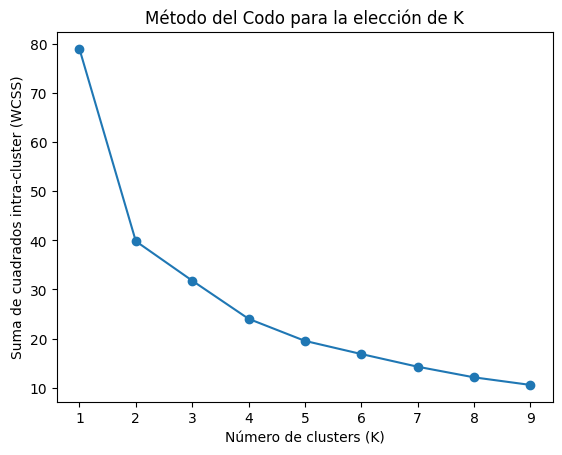

In [ ]:
plt.plot(possible_k_values, wcss, marker='o')
plt.title('Método del Codo para la elección de K')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Suma de cuadrados intra-cluster (WCSS)')
plt.show()

sacar el kmeans del optimal k

In [ ]:
optimal_k = 2  # Ajusta según el punto de codo identificado en la gráfica
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(distances)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

sacar el labels del kmeans

In [ ]:
labels = kmeans.labels_

definir la función para sacar el plot 3d

In [ ]:
def plot_3d_scatter(embedding, labels, title):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=labels, cmap='viridis', edgecolor='k', s=50)
    for i, txt in enumerate(df['Seña']):
        x_offset = random.uniform(-0.08, 0.08)
        y_offset = random.uniform(-0.08, 0.08)
        z_offset = random.uniform(-0.08, 0.08)
        ax.text(embedding[i, 0] + x_offset, embedding[i, 1] + y_offset, embedding[i, 2] + z_offset, txt, size=8, zorder=1, color='k')
    ax.set_title(title)
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.set_zlabel('PCA Component 3')
    plt.legend(*scatter.legend_elements(), title="Clusters")
    plt.show()

realizar el gráfico 3d

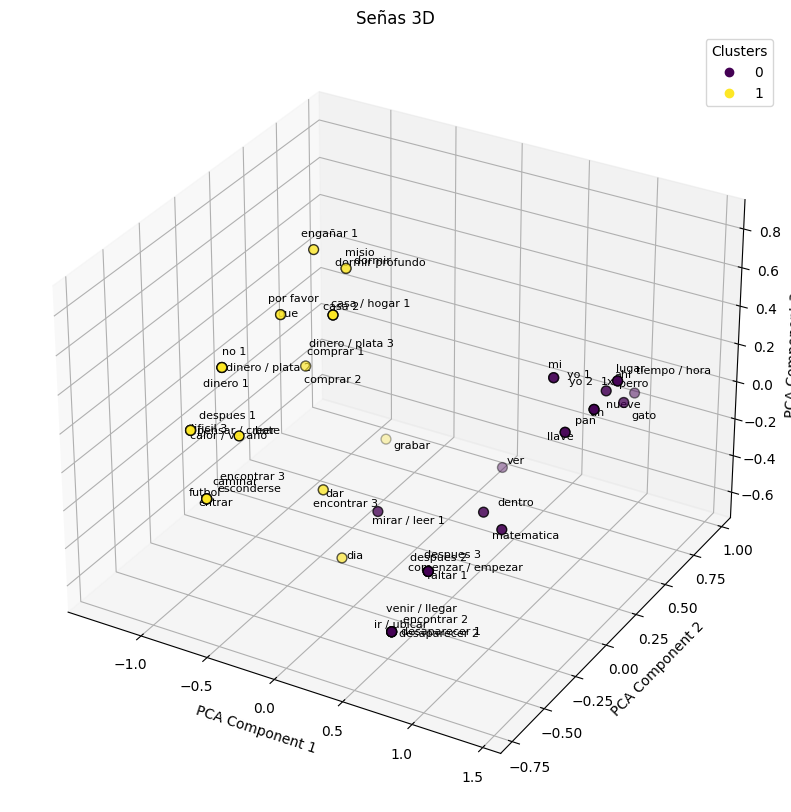

In [ ]:
plot_3d_scatter(embedding, labels = kmeans.labels_, title = 'Señas 3D')

Habilitamos la visualización de gráficos en el cuaderno. Nota: Solo funciona en Spyder

In [ ]:
%matplotlib auto

Using matplotlib backend: <object object at 0x7e07b5093650>


repetimos todo con otros optimal k

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


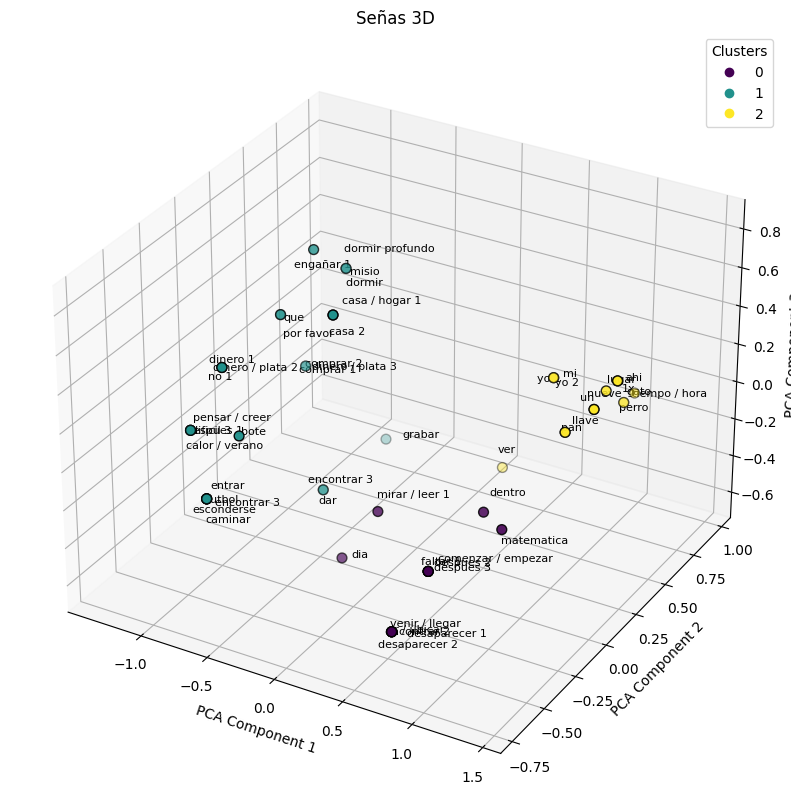

In [ ]:
optimal_k = 3  # Ajusta según el punto de codo identificado en la gráfica
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(distances)

labels = kmeans.labels_
plot_3d_scatter(embedding, labels = kmeans.labels_, title = 'Señas 3D')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


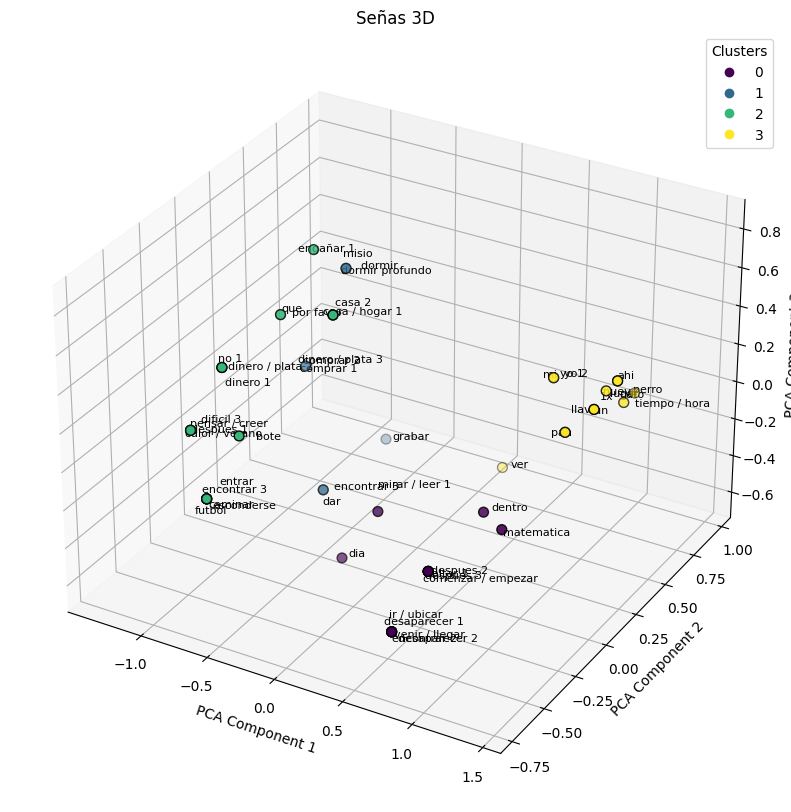

In [ ]:
optimal_k = 4  # Ajusta según el punto de codo identificado en la gráfica
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(distances)

labels = kmeans.labels_
plot_3d_scatter(embedding, labels = kmeans.labels_, title = 'Señas 3D')

Heatmap de recursos icónicos x recursos icónicos

<ipython-input-14-7e521187ae0c>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfheatmap = sns.heatmap(df.corr(),


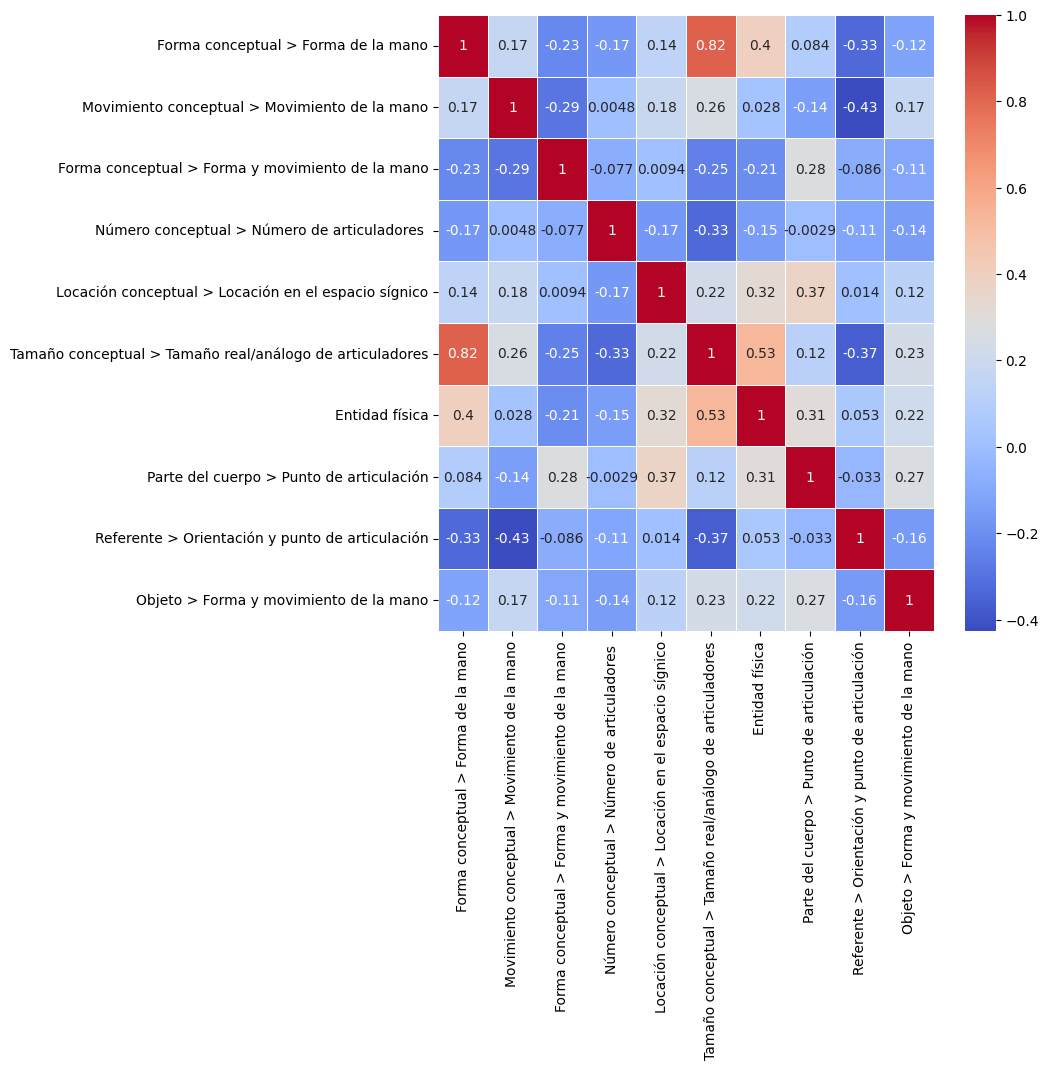

In [ ]:
# Importamos seaborn para poder graficar el heatmap

import seaborn as sns
plt.figure(figsize=(8,8))
dfheatmap = sns.heatmap(df.corr(),
annot = True, cmap='coolwarm', linewidths=.5) # True para visualizar anotaciones

Para los recursos icónicos x cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


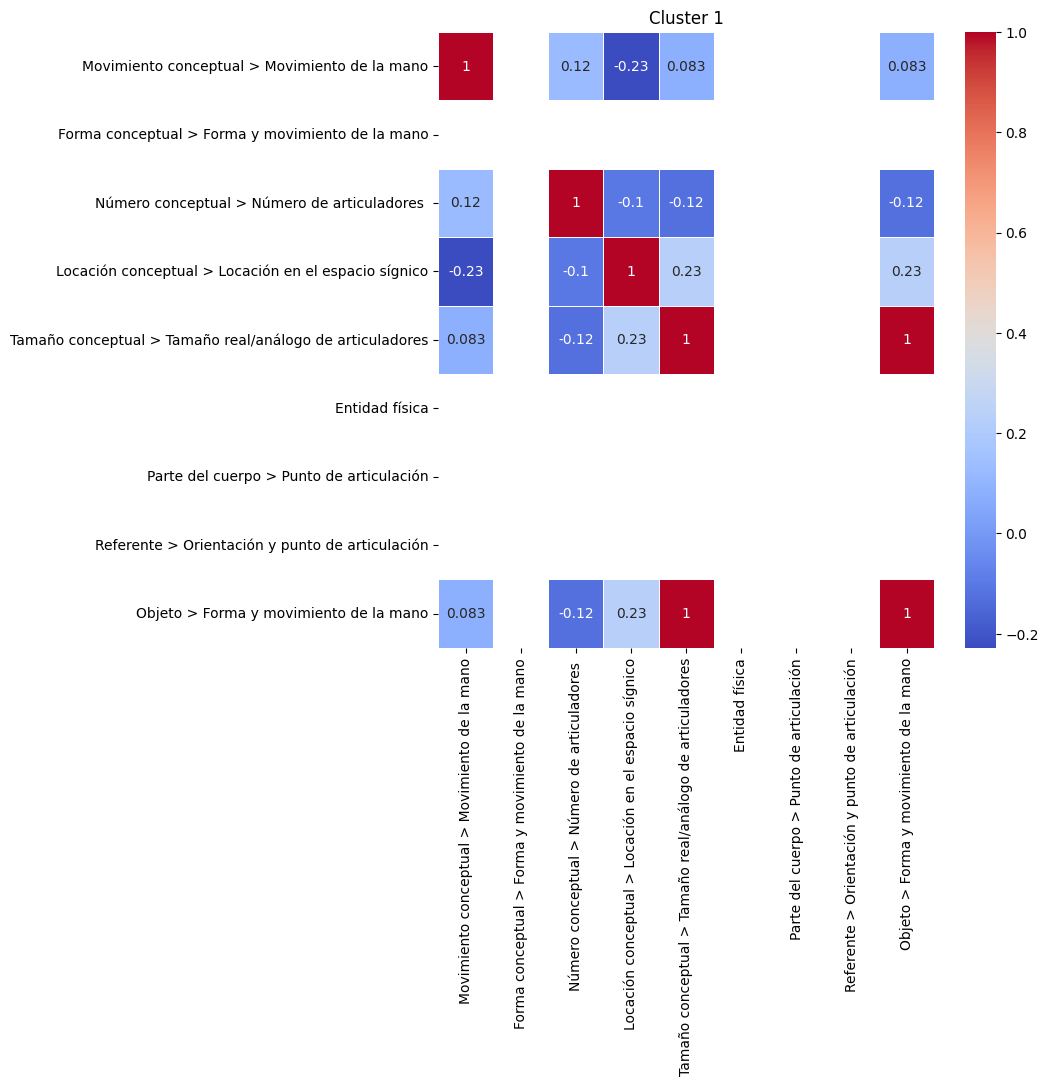

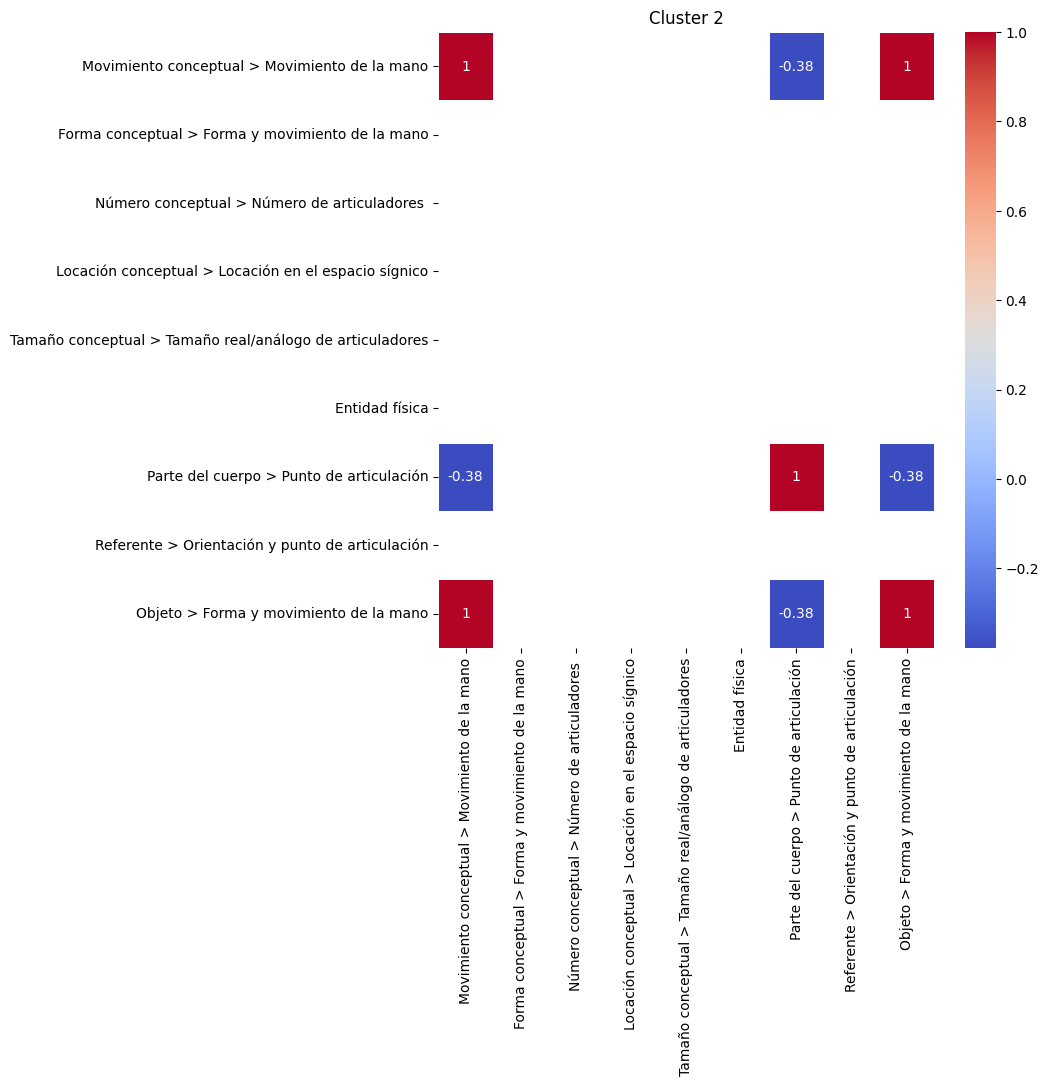

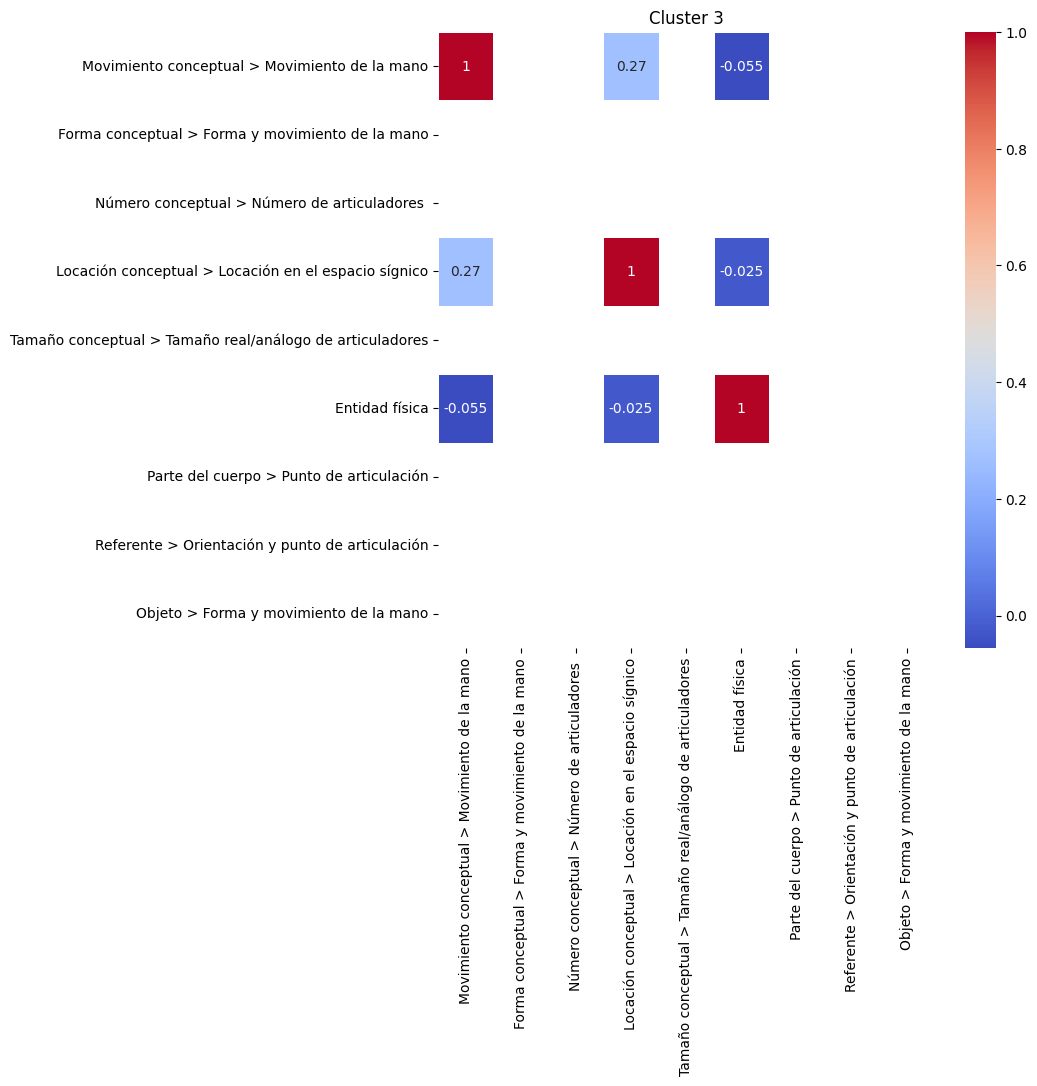

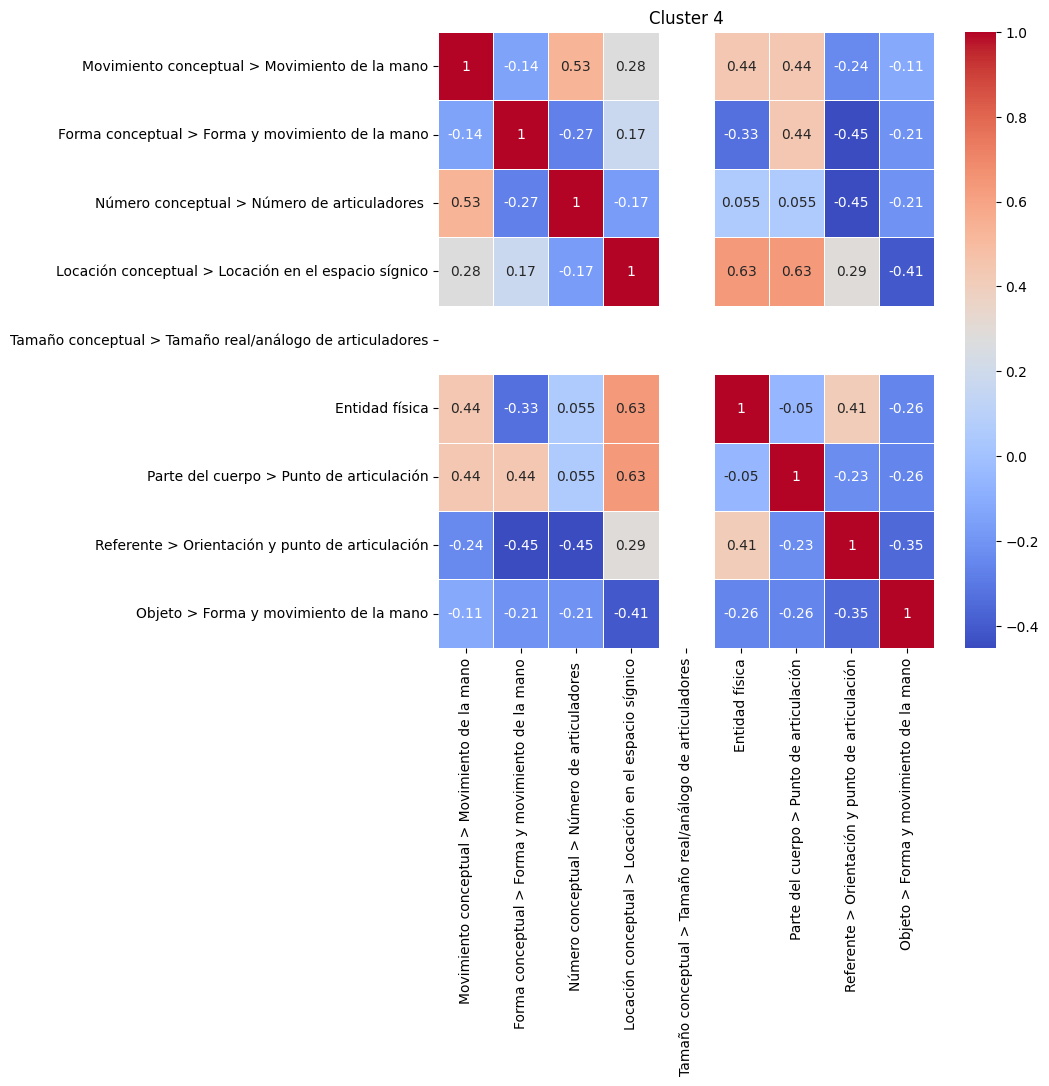

In [ ]:
import random
import seaborn as sns

random.seed(0)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elegir el valor óptimo de k (observa el codo en la curva) y aplicar K-means
optimal_k = 4  # Ajusta según el punto de codo identificado en la gráfica
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(distances)

# Obtener los clusters
labels = kmeans.labels_

# Crear un heatmap de cada cluster
for i in range(optimal_k):
  cluster_features = df[labels == i].iloc[:, 2:]
  cluster_corr = cluster_features.corr()

  plt.figure(figsize=(8, 8))
  sns.heatmap(cluster_corr,
              annot=True,
              cmap='coolwarm',
              linewidths=.5)
  plt.title(f'Cluster {i+1}')
  plt.show()


# Considerando que las señas en cada cluster difieren de los recursos icónicos en los que se codifican
# al compararlas con los recursos globales, visualizamos estos espacios en blanco que se interpretan como la ausencia de los mismos en cada seña.